<a href="https://colab.research.google.com/github/desean2394/IT7103-Fall-2024/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('auto-mpg.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Check data types and missing values
print(df.info())
print(df.isnull().sum())

# Convert 'horsepower' to numeric, handling errors
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.isnull().sum())  # Check for missing values after conversion


Saving auto-mpg.csv to auto-mpg (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin        

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training (75%) and testing (25%) sets
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Check the shapes of the train and test DataFrames
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)


Training data shape: (298, 9)
Testing data shape: (100, 9)


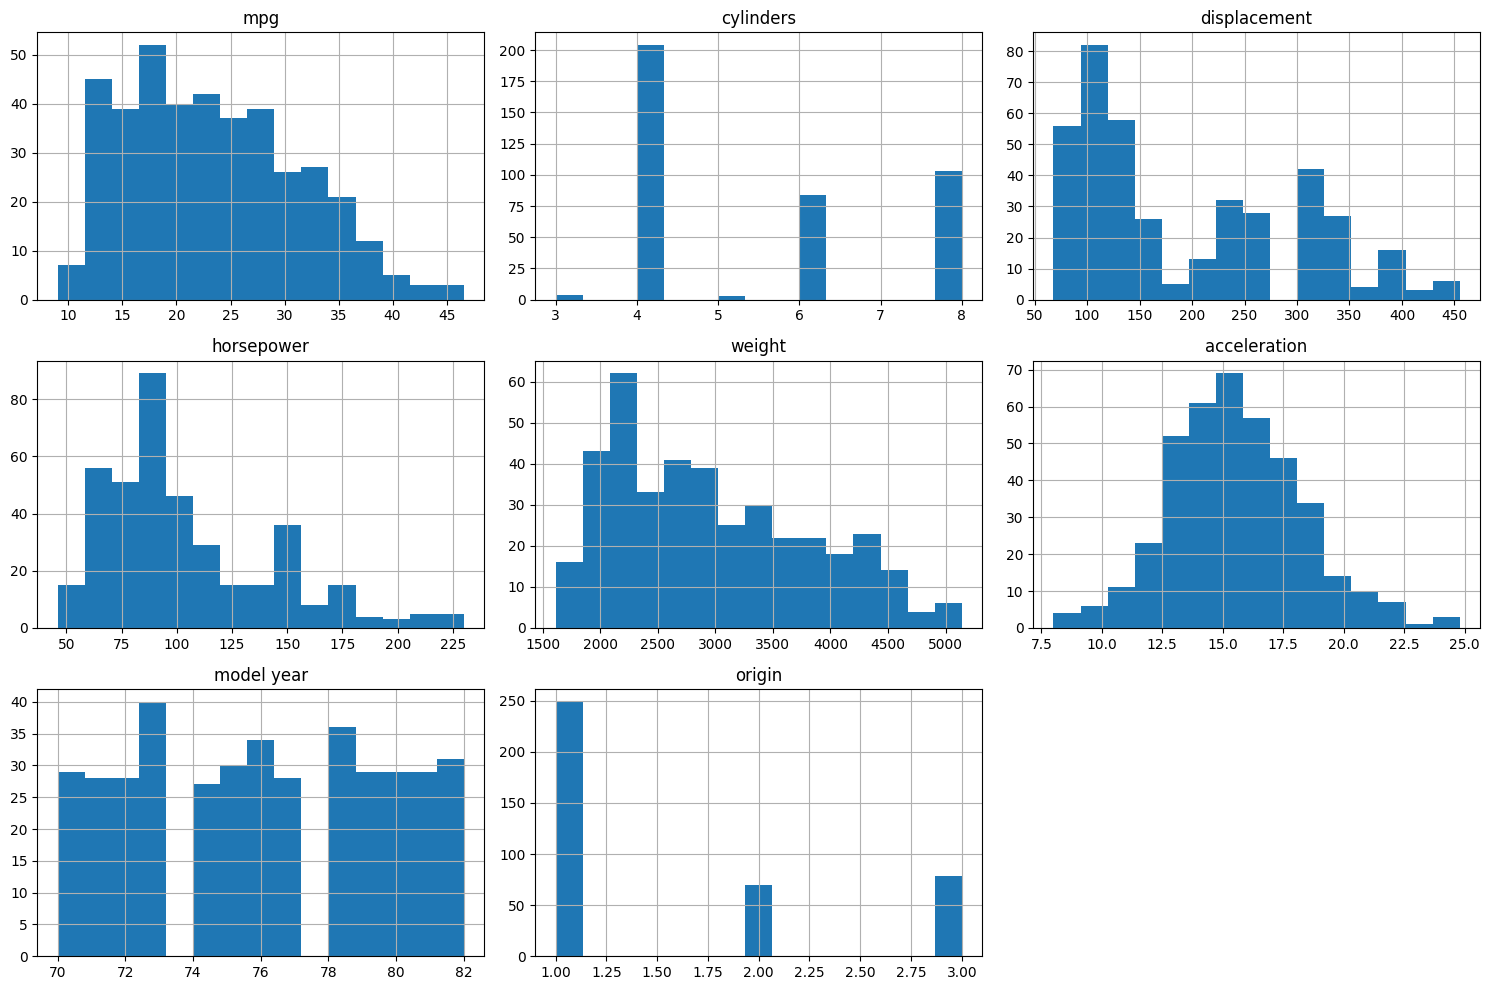

Symmetric columns: ['mpg', 'acceleration', 'model year']
Skewed columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'origin']
Categorical columns: ['cylinders', 'origin']


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize histograms for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Identify symmetric and skewed columns
symmetric_cols = []
skewed_cols = []
categorical_cols = ['cylinders', 'origin']  # Example categorical columns

for col in numeric_cols:
    if df[col].skew() < 0.5:
        symmetric_cols.append(col)
    else:
        skewed_cols.append(col)

print("Symmetric columns:", symmetric_cols)
print("Skewed columns:", skewed_cols)
print("Categorical columns:", categorical_cols)


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder

# Define preprocessing pipelines
numeric_transformers_symmetric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_transformers_skewed = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('sym', numeric_transformers_symmetric, symmetric_cols),
        ('skew', numeric_transformers_skewed, skewed_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [9]:
# Check the columns in the DataFrame
print(df.columns.tolist())


['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [12]:
# Clean column names
df.columns = df.columns.str.strip()

In [13]:
# Check if 'mpg' is in the DataFrame columns
print('mpg' in df.columns)  # This should return True

True


In [14]:
# Prepare the data for fitting
X_train = train_df.drop(columns=['mpg', 'car name'], errors='ignore')  # Features
y_train = train_df['mpg']  # Target

In [18]:
# Prepare the data for fitting
X_train = train_df.drop(columns=['mpg', 'car name'], errors='ignore')  # Features
y_train = train_df['mpg']  # Target

# Check the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (298, 7)
y_train shape: (298,)


In [20]:
# Check the columns in train_df and test_df
print("Train DataFrame columns:", train_df.columns.tolist())
print("Test DataFrame columns:", test_df.columns.tolist())

Train DataFrame columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
Test DataFrame columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [21]:
# Clean column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()


In [22]:
# Prepare the data for fitting
X_train = train_df.drop(columns=['mpg', 'car name'], errors='ignore')  # Features
y_train = train_df['mpg']  # Target

# Check the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (298, 7)
y_train shape: (298,)


In [25]:
# Prepare the data for fitting
X_train = train_df.drop(columns=['mpg', 'car name'], errors='ignore')  # Features
y_train = train_df['mpg']  # Target

# Create X_test from the test DataFrame
X_test = test_df.drop(columns=['mpg', 'car name'], errors='ignore')  # Features for test


In [26]:
# Check columns in X_train and X_test
print("X_train columns:", X_train.columns.tolist())
print("X_test columns:", X_test.columns.tolist())


X_train columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
X_test columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


In [28]:
# Print column names to check for any leading/trailing whitespace
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [29]:
df.columns = df.columns.str.strip()

In [30]:
print(df.columns.tolist())

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [31]:
print(df.columns.duplicated())

[False False False False False False False False False]


In [33]:
# Check if 'mpg' is in the columns of your DataFrame
if 'mpg' not in X_train.columns:
    # If 'mpg' is not in the columns, check for potential alternatives or typos.
    print("Available columns:", X_train.columns)
    # If you find a similar column name, correct the ColumnTransformer configuration.
    # For example, if the column is named 'MPG', change the ColumnTransformer:
    # preprocessor = ColumnTransformer(transformers=[
    #     ('num', num_pipeline, ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'MPG']),
    #     ('cat', cat_pipeline, ['origin'])
    # ])
    # Otherwise, if the column is truly missing, you may need to:
    # 1. Re-examine your data loading and preparation steps to ensure 'mpg' is included.
    # 2. If 'mpg' is not available, consider removing or replacing the relevant step in the ColumnTransformer.

Available columns: Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming num_pipeline and cat_pipeline are already defined

# Update ColumnTransformer to exclude 'mpg'
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']), # Removed 'mpg'
    ('cat', cat_pipeline, ['origin'])
])

# Fit the preprocessor on training data
preprocessor.fit(X_train)

# Transform both training and testing sets
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Print shapes of the processed data
print("Processed training data shape:", X_train_processed.shape)
print("Processed testing data shape:", X_test_processed.shape)

Processed training data shape: (298, 9)
Processed testing data shape: (100, 9)
